# DATA SCIENCE PROJECT
## Data Analysis

In this part, we will analyze the data we have collected. We will try to find some patterns and correlations between the data.

Let's start by importing the libraries we will need, and the clean data we have saved in the previous part.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
x = pd.read_csv('data/valeursfoncieres-2022.csv')
y = pd.read_csv('data/valeursfoncieres-2022-target.csv')

## Means and Deviation

Let's start by looking at the distribution of the data. We will plot the distribution of the data for each feature.

Text(0.5, 1.0, 'Target Standard Deviation')

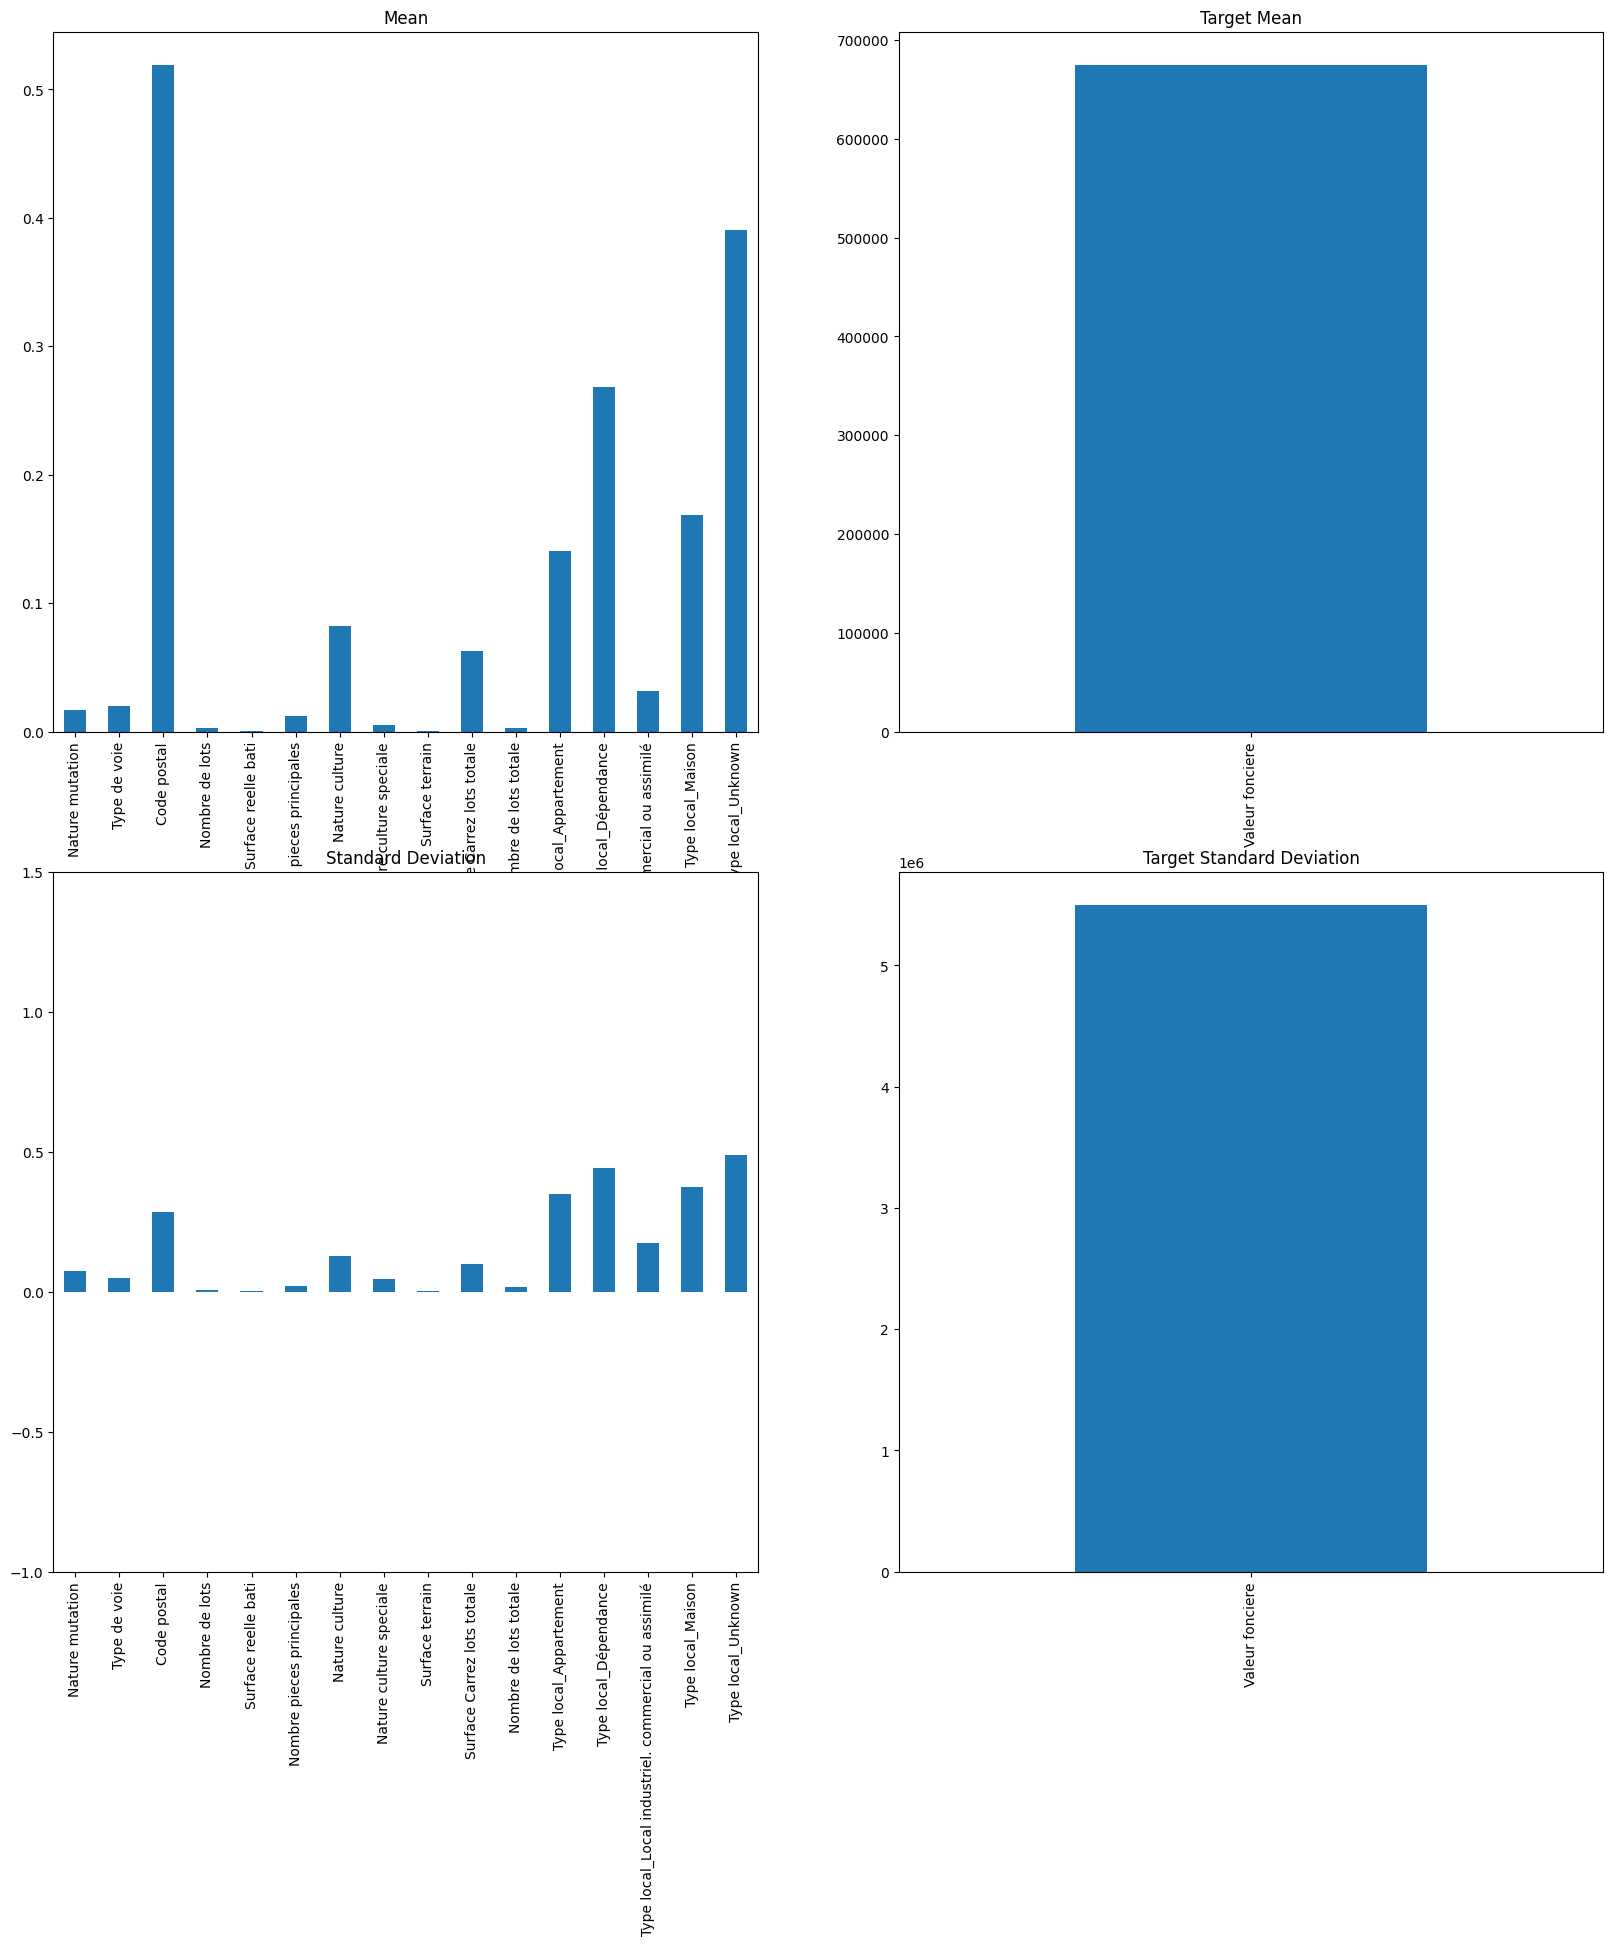

In [2]:

# create sumbplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# plot the means
x.mean().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Mean')

y.mean().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Target Mean')

# plot the standard deviation
x.std().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Standard Deviation')
axes[1, 0].set_ylim([-1, 1.5])


y.std().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Target Standard Deviation')

As we can see, the variables are normalized. The Mean variable are almost all positive. The mean of the target variable is 674 821.

## Distribution

Now let's observe the distribution of each variable

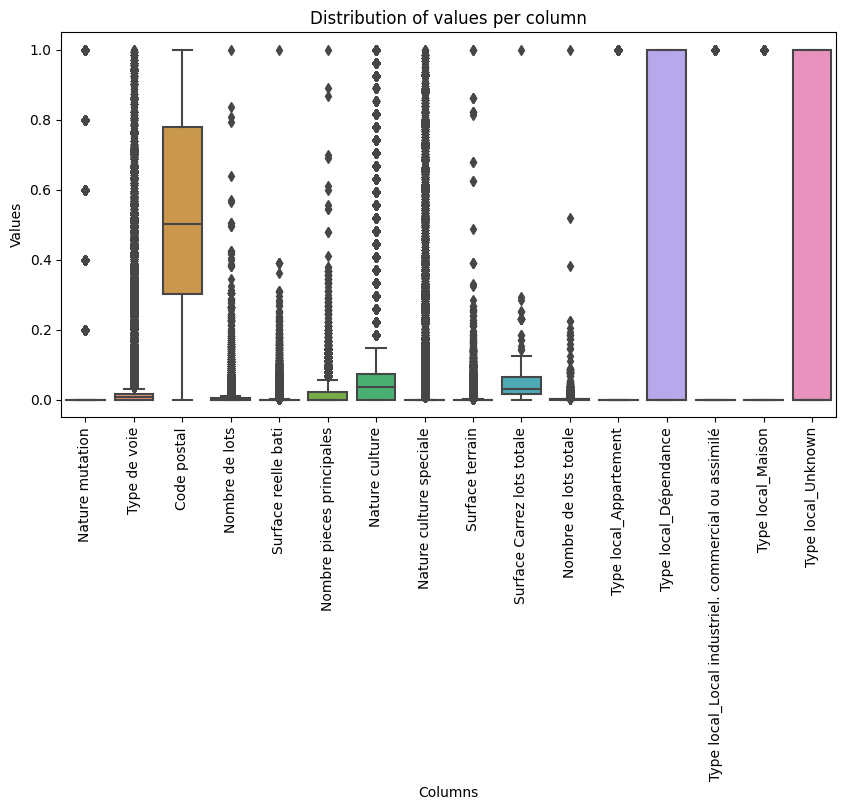

In [3]:
# Select the numerical columns to plot
# Plot the distributions
plt.figure(figsize=(10, 5))
sns.boxplot(data=x)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Distribution of values per column')
plt.show()

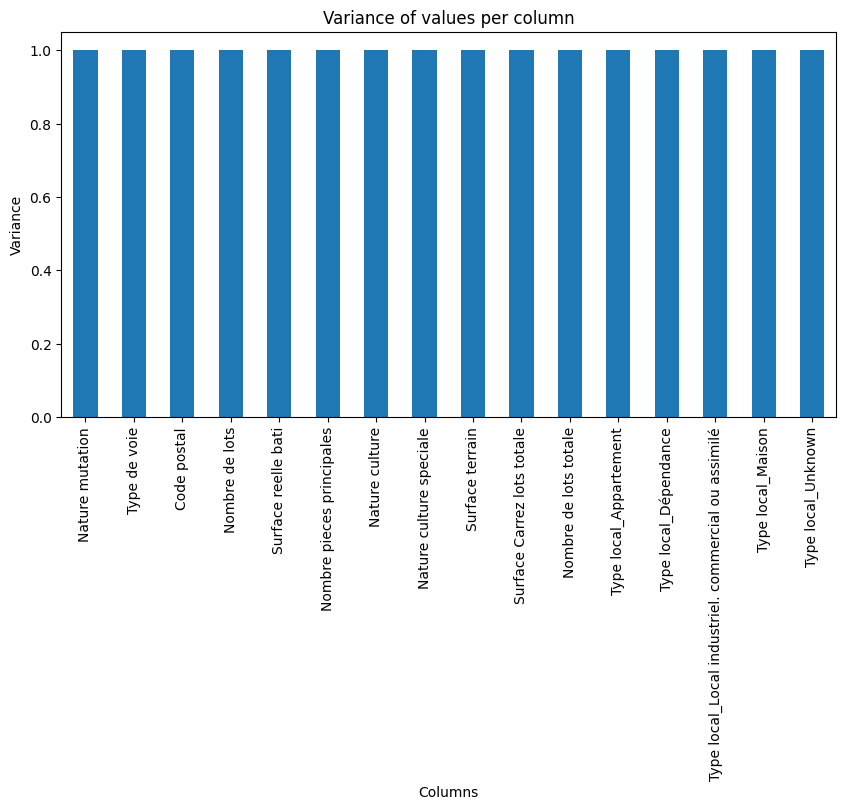

In [4]:
# plot the variance of the data
# normalize the data
x = (x - x.min()) / (x.max() - x.min())

variance = x.max() - x.min()
variance.plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.title('Variance of values per column')
plt.show()
